In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, f1_score, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [31]:
def clean_data(df):
    # Drop unnecessary columns
    df = df.drop(columns=['PassengerId', 'Ticket', 'Cabin', 'Name'])

    # Replace missing values
    df['Age'] = df['Age'].fillna(int(df['Age'].mean()))
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df['Fare'] = df['Fare'].fillna(df['Fare'].mode()[0])

    # Convert 'Sex' column to numeric
    df['Sex'] = df['Sex'].replace({'female': 0, 'male': 1})

    # Calculate total family size
    df['Total_family'] = df['Parch'] + df['SibSp']
    df = df.astype({'Total_family': 'int8'})

    # Encode categorical 'Embarked' column
    df = pd.get_dummies(df, columns=['Embarked'])

    return df

df = pd.read_csv('train -2.csv')
df_clean = clean_data(df.copy())

df = pd.read_csv('test-2.csv')
df_test = clean_data(df.copy())

gender_submission_df = pd.read_csv('gender_submission -2.csv')


In [33]:
nan_percent = df_clean.isna().mean() * 100
nan_percent.name = "NaN Percent"
nan_percent.round(2).sort_values(ascending=False).to_frame()

,NaN Percent
Survived,0.0
Pclass,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Fare,0.0
Total_family,0.0
Embarked_C,0.0
Embarked_Q,0.0


In [35]:
nan_percent = df_test.isna().mean() * 100
nan_percent.name = "NaN Percent"
nan_percent.round(2).sort_values(ascending=False).to_frame()

,NaN Percent
Pclass,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Fare,0.0
Total_family,0.0
Embarked_C,0.0
Embarked_Q,0.0
Embarked_S,0.0


In [37]:
corr = pd.get_dummies(df_clean).corr()
corr.style.background_gradient(cmap="coolwarm")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Total_family,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.543351,-0.067814,-0.035322,0.081629,0.257307,0.016639,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,0.131900,-0.334974,0.083081,0.018443,-0.549500,0.065997,-0.243292,0.221009,0.074053
Sex,-0.543351,0.131900,1.000000,0.082949,-0.114631,-0.245489,-0.182333,-0.200988,-0.082853,-0.074115,0.119224
Age,-0.067814,-0.334974,0.082949,1.000000,-0.232978,-0.176486,0.093706,-0.247402,0.031303,-0.021093,-0.014149
SibSp,-0.035322,0.083081,-0.114631,-0.232978,1.000000,0.414838,0.159651,0.890712,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,-0.245489,-0.176486,0.414838,1.000000,0.216225,0.783111,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,-0.182333,0.093706,0.159651,0.216225,1.000000,0.217138,0.269335,-0.117216,-0.162184
Total_family,0.016639,0.065997,-0.200988,-0.247402,0.890712,0.783111,0.217138,1.000000,-0.046215,-0.058592,0.077359
Embarked_C,0.168240,-0.243292,-0.082853,0.031303,-0.059528,-0.011069,0.269335,-0.046215,1.000000,-0.148258,-0.782742
Embarked_Q,0.003650,0.221009,-0.074115,-0.021093,-0.026354,-0.081228,-0.117216,-0.058592,-0.148258,1.000000,-0.499421


<function matplotlib.pyplot.show(close=None, block=None)>

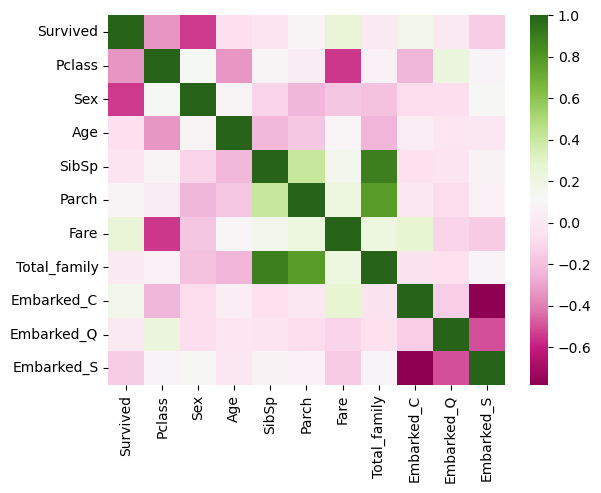

In [39]:
#print(plt.colormaps())
sns.heatmap(df_clean.corr(), cmap='PiYG')
plt.show

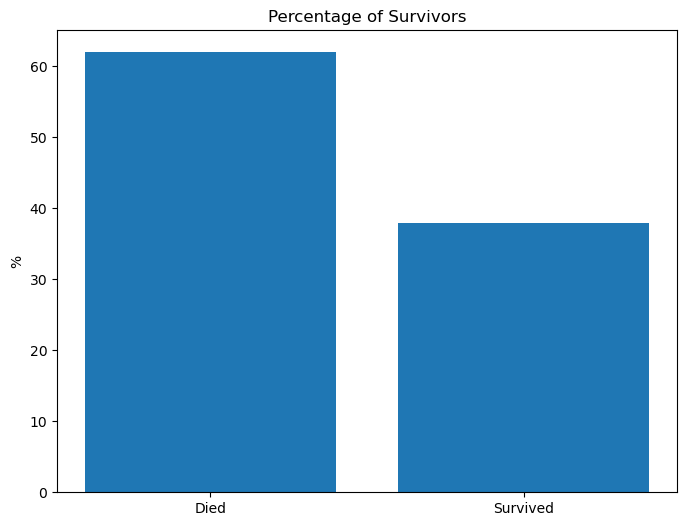

In [41]:
survived_counts = df_clean["Survived"].replace({0: "Died", 1: "Survived"}).value_counts(normalize=True)
survived_coutns = (survived_counts * 100).round()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.bar(survived_coutns.index, survived_coutns)
ax.set_title("Percentage of Survivors")
ax.set_ylabel("%")

fig.show()

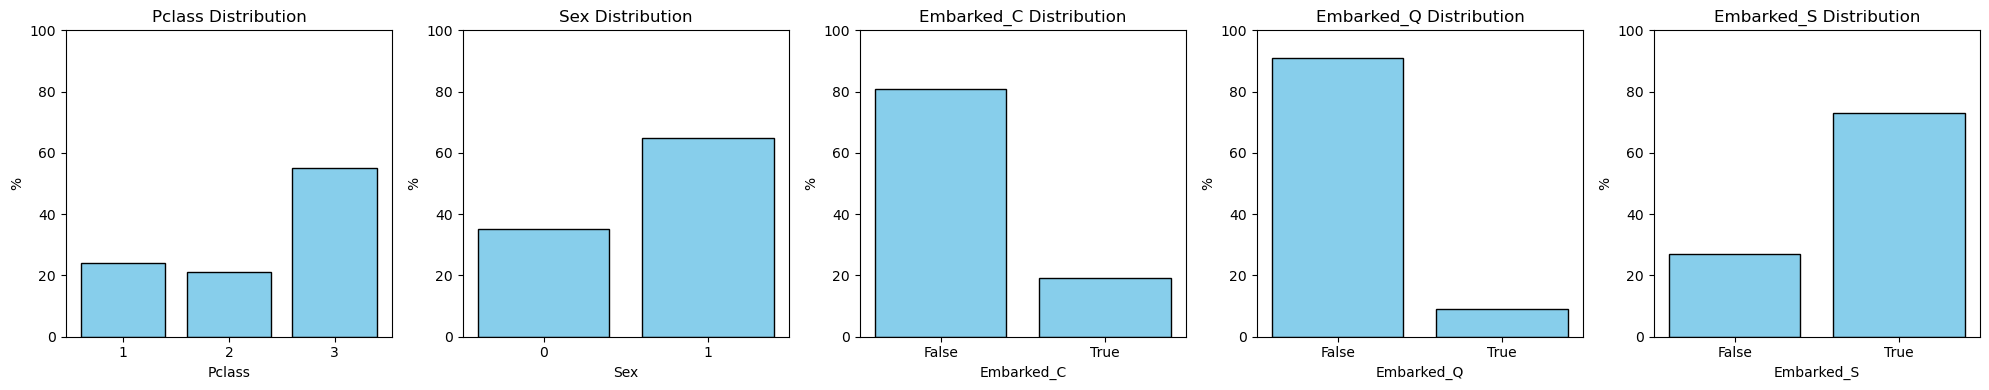

In [43]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))  # Increased figure size for better visibility

# Column names to plot
columns_to_plot = ["Pclass", "Sex", "Embarked_C", "Embarked_Q", "Embarked_S"]

for ax, column_name in zip(axes, columns_to_plot):
    # Calculate normalized value counts
    value_counts = df_clean[column_name].value_counts(normalize=True) * 100
    
    # Round the values and sort index
    value_counts = value_counts.round().sort_index()
    
    # Create bar plot
    ax.bar(value_counts.index.astype(str), value_counts, color='skyblue', edgecolor='black')
    
    # Set title and labels
    ax.set_title(f"{column_name} Distribution")
    ax.set_ylabel("%")
    ax.set_xlabel(column_name)  # Add x-label for clarity
    ax.set_ylim(0, 100)  # Set y-axis limit to 100%

# Adjust layout and show plot
fig.tight_layout()
plt.show()

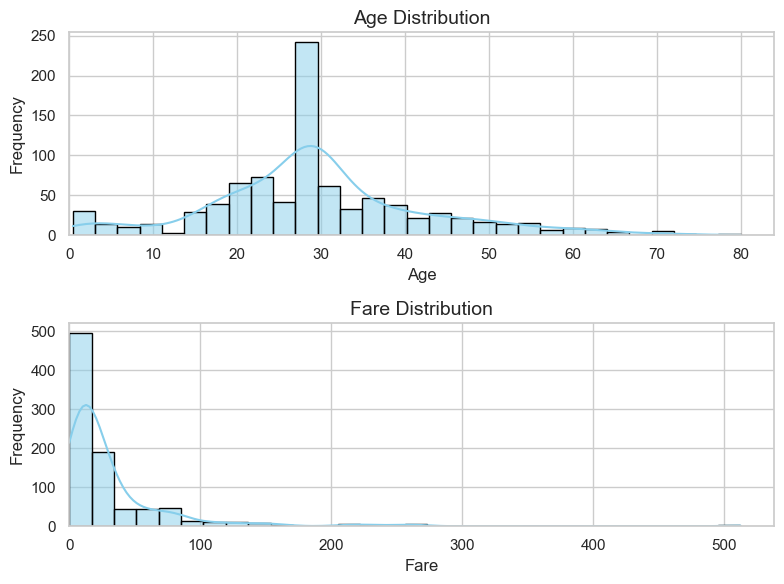

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# Plot histogram for 'Age' and 'Fare'
for ax, column_name in zip(axes, ["Age", "Fare"]):
    # Create a histogram
    sns.histplot(df_clean[column_name], bins=30, kde=True, ax=ax, color='skyblue', edgecolor='black')
    
    # Set title and labels
    ax.set_title(f"{column_name} Distribution", fontsize=14)
    ax.set_xlabel(column_name, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.set_xlim(left=0)  # Set x-axis lower limit to 0

# Adjust layout
fig.tight_layout()
plt.show()

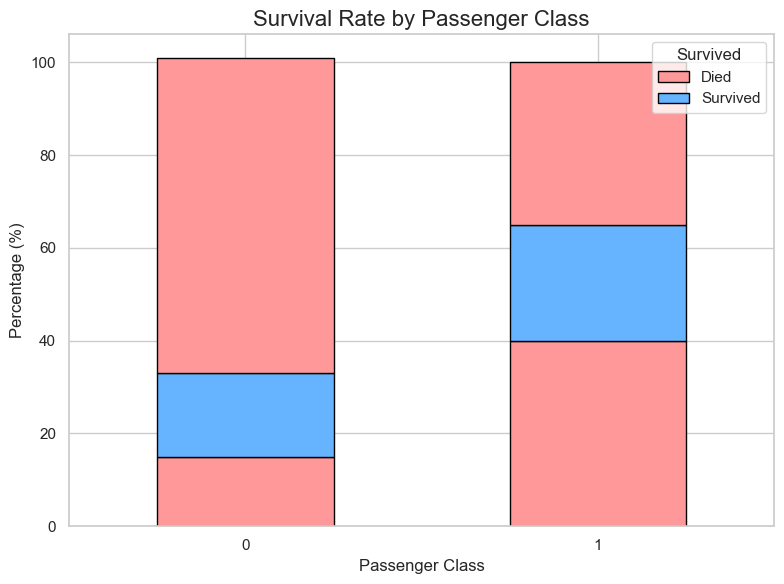

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Group by 'Survived' and 'Pclass', calculate percentage
pclass_counts = df_clean.groupby("Survived")["Pclass"].value_counts(normalize=True) * 100
pclass_counts = pclass_counts.round()

# Create a DataFrame for easier plotting
pclass_counts_df = pclass_counts.unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Stacked bar plot
pclass_counts_df.plot(kind='bar', stacked=True, ax=ax, color=['#ff9999', '#66b3ff'], edgecolor='black')

# Set title and labels
ax.set_title("Survival Rate by Passenger Class", fontsize=16)
ax.set_ylabel("Percentage (%)", fontsize=12)
ax.set_xlabel("Passenger Class", fontsize=12)
ax.set_xticklabels(pclass_counts_df.index.astype(str), rotation=0)  # Set x-ticks to be class labels

# Adding a legend
ax.legend(title='Survived', labels=['Died', 'Survived'], loc='upper right')

# Show plot
plt.tight_layout()
plt.show()


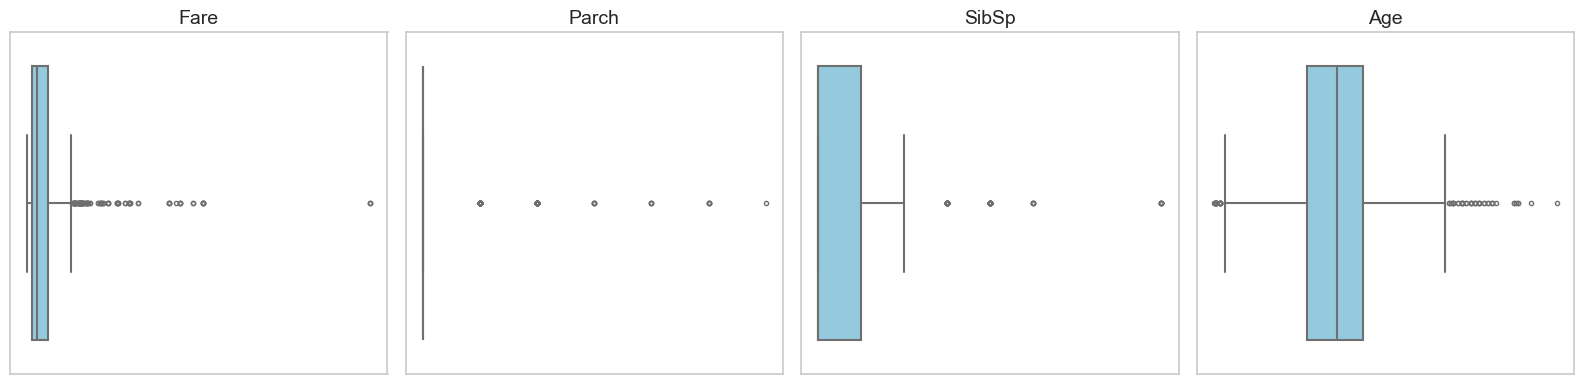

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create subplots
figure, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))  # Increased width for better visibility

# List of columns to plot
columns_to_plot = ["Fare", "Parch", "SibSp", "Age"]

for ax, column_name in zip(axes, columns_to_plot):
    # Create a boxplot using Seaborn
    sns.boxplot(x=df_clean[column_name], ax=ax, color='skyblue', fliersize=3, linewidth=1.5)
    
    # Set title and remove x-ticks
    ax.set_title(column_name, fontsize=14)
    ax.set_xlabel('')  # Clear x-label for cleanliness
    ax.set_xticks([])

# Adjust layout
figure.tight_layout()
plt.show()


In [51]:
train_data = pd.get_dummies(df_clean)
train_data = train_data.fillna(train_data.mean())
X = train_data.drop(["Survived"], axis=1)
y = train_data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [53]:
#Simple Logistic Regression
model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(X_train, y_train)

accuracy = model_LR.score(X_test, y_test) * 100
print(f"Model achieves accuracy of {accuracy:.2f}% on the test set.")

Model achieves accuracy of 78.21% on the test set.


In [55]:
pd.DataFrame(
    index=pd.Index(X_train.columns, name="Feature"),
    data={"Coefficient": model_LR.coef_[0]}
).sort_values("Coefficient", ascending=False)

,Coefficient
Feature,
Embarked_Q,0.199060
Fare,0.003423
Parch,-0.007102
Age,-0.033992
Embarked_C,-0.040917
Embarked_S,-0.132798
SibSp,-0.155210
Total_family,-0.162312
Pclass,-0.986520


Accuracy: 0.78
AUC: 0.85
F1 Score: 0.72


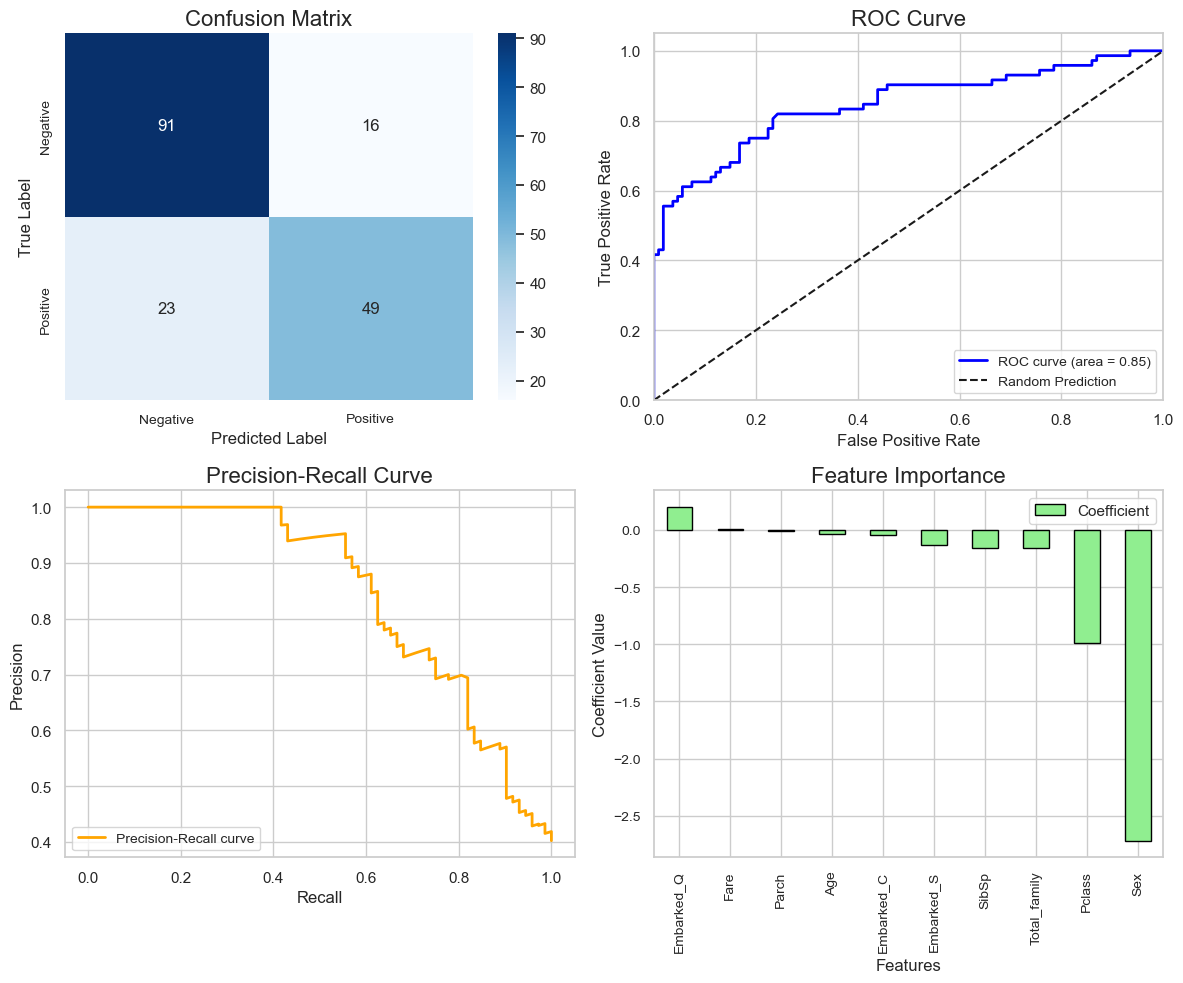

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (confusion_matrix, roc_curve, precision_recall_curve, 
                             roc_auc_score, f1_score, accuracy_score)

# Predict probabilities and classifications
y_pred_prob = model_LR.predict_proba(X_test)[:, 1]
y_pred = model_LR.predict(X_test)

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"AUC: {auc_score:.2f}")
print(f"F1 Score: {f1:.2f}")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'], ax=axes[0, 0])
axes[0, 0].set_title("Confusion Matrix", fontsize=16)
axes[0, 0].set_xlabel("Predicted Label", fontsize=12)
axes[0, 0].set_ylabel("True Label", fontsize=12)
axes[0, 0].tick_params(axis='both', which='major', labelsize=10)

# ROC Curve
axes[0, 1].plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc_score:.2f})', linewidth=2)
axes[0, 1].plot([0, 1], [0, 1], 'k--', label='Random Prediction')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate', fontsize=12)
axes[0, 1].set_ylabel('True Positive Rate', fontsize=12)
axes[0, 1].set_title('ROC Curve', fontsize=16)
axes[0, 1].legend(loc="lower right", fontsize=10)

# Precision-Recall Curve
axes[1, 0].plot(recall, precision, color='orange', label='Precision-Recall curve', linewidth=2)
axes[1, 0].set_xlabel('Recall', fontsize=12)
axes[1, 0].set_ylabel('Precision', fontsize=12)
axes[1, 0].set_title('Precision-Recall Curve', fontsize=16)
axes[1, 0].legend(loc="lower left", fontsize=10)

# Feature Importance
feature_importance = pd.DataFrame(model_LR.coef_[0], index=X_train.columns, columns=["Coefficient"]).sort_values(by="Coefficient", ascending=False)
feature_importance.plot(kind='bar', ax=axes[1, 1], color='lightgreen', edgecolor='black')
axes[1, 1].set_title('Feature Importance', fontsize=16)
axes[1, 1].set_ylabel('Coefficient Value', fontsize=12)
axes[1, 1].set_xlabel('Features', fontsize=12)
axes[1, 1].tick_params(axis='both', which='major', labelsize=10)

# Adjust layout
fig.tight_layout()
plt.show()


In [61]:
# Use the trained model to make predictions
X_test_final = df_test
test_predictions = model_LR.predict(X_test_final)

# Calculate the accuracy using the 'gender submission' as ground truth
y_test_final = gender_submission_df['Survived']
test_accuracy = accuracy_score(y_test_final, test_predictions) * 100
print(f"Model achieves accuracy of {test_accuracy:.2f}% on the final test set.")

# Prepare the submission DataFrame
submission_df = pd.DataFrame({
    'PassengerId': gender_submission_df['PassengerId'],
    'Survived': test_predictions
})
submission_path = 'titanic_submission.csv'
submission_df.to_csv(submission_path, index=False)

submission_df.head()

Model achieves accuracy of 95.69% on the final test set.


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
